In [1]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns # NB needs Seaborn 0.9.0
import lxml
from bs4 import BeautifulSoup as soup
import sys
import os
import urllib

# enable inline printing
%matplotlib inline

# set some address variables
directory = r"C:\Users\Justin\Documents\Python Scripts\Blog"
CSV_directory = r"C:\Users\Justin\Documents\Python Scripts\Blog\CSVs"

# initialise the program path
os.chdir(directory)

# suppress warnings if desired
import warnings
warnings.simplefilter('ignore')
#warnings.simplefilter('default')

In [2]:
# grab the lead page of the survey from:
# survey: https://data.edinburghopendata.info/dataset/bike-counter-data-set-cluster
# license: http://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/

main_URL = r"https://data.edinburghopendata.info/dataset/bike-counter-data-set-cluster"
main_URL = r"https://data.edinburghopendata.info/dataset/bike-counter-data-set-cluster/resource/c1014c68-3fdf-4fb7-8318-7f0d6b31286d"
URL_list = []

# grab the parent page
request = urllib.request.Request(main_URL)
opened = urllib.request.urlopen(request)
main_HTML = opened.read()
opened.close()

# Convert HTML to soup for parsing
soup_main = soup(main_HTML, "html.parser")

In [3]:
# Now lets get a list of the pages containing the CSVs to download
link_list = []
for link in soup_main.find_all('a'):
    # extract the relative link
    link_text = link.get('href')
    # check our reyruns are valid string
    if isinstance(link_text, str):
        # and that they are the kind of link we need
        if (link_text[:48] == "/dataset/bike-counter-data-set-cluster/resource/"): 
            link_list += ['https://data.edinburghopendata.info' + link_text]
print(len(link_list))

46


In [4]:
# now lets cycle over these addresses and get the URLs for the data
CSV_page_list = []
#class_list = []
# cycle over our previously obtained links
for link in link_list:
    request = urllib.request.Request(link)
    opened = urllib.request.urlopen(request)
    CSV_page = opened.read()
    opened.close()
    # Convert HTML to soup for parsing
    soup_page = soup(CSV_page, "html.parser")
    # extract a list of all the 'a' tags
    tag_list = soup_page.find_all('a')
    #print(tag_list[10:20])
    for tag in tag_list:
        link_class = tag.get('class')
        #class_list += [link_class]
        # the tags we want are handed back as a list
        if isinstance(link_class, list):
            #print(link_class[:10])
            #if link_class == ['btn', 'btn-primary', 'resource-url-analytics', 'resource-type-None']:
            if link_class == ["resource-url-analytics"]:
                #print("FOUND")
                CSV_page_list += [tag.get('href')]
    
# remove doubles
CSV_page_list = list(set(CSV_page_list))
print(len(CSV_page_list))
print(CSV_page_list[0])

45
https://data.edinburghopendata.info/dataset/d4a86f41-5e78-48cd-adb8-2064acf93ef0/resource/c175ae9e-5d11-4691-a504-329c3fa2d8cb/download/10rbsgogar.csv


In [5]:
# now lets cycle over these addresses and get the URLs for the data
CSV_page_list = []

# cycle over our previously obtained links
for link in link_list:
    request = urllib.request.Request(link)
    opened = urllib.request.urlopen(request)
    CSV_page = opened.read()
    opened.close()
    # Convert HTML to soup for parsing
    soup_page = soup(CSV_page, "html.parser")
    # extract a list of all the 'a' tags
    tag_list = soup_page.find_all('a')
    # cycle over the tag list for the current page
    for tag in tag_list:
        link_class = tag.get('class')
        # the tags we want are handed back as a list, filter any oddities
        if isinstance(link_class, list):
            #find the link we want
            if link_class == ["resource-url-analytics"]:
                #print("FOUND")
                CSV_page_list += [tag.get('href')]
    
# remove doubles
CSV_page_list = list(set(CSV_page_list))
print(len(CSV_page_list))
print(CSV_page_list[0])

45
https://data.edinburghopendata.info/dataset/d4a86f41-5e78-48cd-adb8-2064acf93ef0/resource/c175ae9e-5d11-4691-a504-329c3fa2d8cb/download/10rbsgogar.csv


In [6]:
# now lets retrieve these CSVs and save locally
os.chdir(CSV_directory)

for CSV_link in CSV_page_list[0:]:
    # read CSV from the web
    df_temp = pd.read_csv(CSV_link, error_bad_lines=False)
    # save a copy of the CSV locally
    df_temp.to_csv(CSV_link[136:], index= False)

In [7]:
# lets load our data from disc into a dictionary
os.chdir(CSV_directory)

df_dict = {}
for file in os.listdir():
    if file.endswith(".csv"):
        data = pd.read_csv(file, error_bad_lines=False)
        CSV_number = int(file[0:2])
        df_dict[CSV_number] = data
        
print(len(df_dict))

45


In [8]:
# now lets take a look at one dataframe
df_example = df_dict[15]
print(df_example.info())
print(df_example.head(14))
df_example.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41256 entries, 0 to 41255
Data columns (total 5 columns):
counter_id    41256 non-null int64
date          41256 non-null object
time          41256 non-null int64
channel_1     41256 non-null int64
channel_2     41256 non-null int64
dtypes: int64(4), object(1)
memory usage: 1.6+ MB
None
    counter_id        date  time  channel_1  channel_2
0           15  29/03/2007    10          0          0
1           15  29/03/2007    11          0          0
2           15  29/03/2007    12          0          0
3           15  29/03/2007    13          0          0
4           15  29/03/2007    14          0          0
5           15  29/03/2007    15          0          0
6           15  29/03/2007    16          0          0
7           15  29/03/2007    17          0          0
8           15  29/03/2007    18          0          0
9           15  29/03/2007    19          0          0
10          15  29/03/2007    20          0          0
1

,counter_id,time,channel_1,channel_2
count,41256.0,41256.000000,41256.000000,41256.000000
mean,15.0,11.500267,17.820414,27.101294
std,0.0,6.922158,27.583784,36.781239
min,15.0,0.000000,0.000000,0.000000
25%,15.0,5.750000,0.000000,2.000000
50%,15.0,12.000000,7.000000,15.000000
75%,15.0,17.250000,25.000000,41.000000
max,15.0,23.000000,225.000000,891.000000


In [9]:
# We need to combine the data for some paired location locations [(38, 39), (40, 41), (44, 45)]
# however we need to ensure that the correct date time information is preserved
# so lets add datetime information to our dataframes and clean our dataframes up
df_dict_times = {}

for key, data in df_dict.items():
    #lets convert the date column to date-time format
    data['date_dt'] =  pd.to_datetime(data['date'], format='%d/%m/%Y')
    data['timedelta'] =  pd.to_timedelta(data['time'], unit = 'h')
    data['datetime'] = data['date_dt'] + data['timedelta']
    
print(df_dict[38].head())

   counter_id        date  time  channel_1  channel_2    date_dt timedelta  \
0          38  09/08/2015     0          1          0 2015-08-09  00:00:00   
1          38  09/08/2015     1          1          0 2015-08-09  01:00:00   
2          38  09/08/2015     2          0          0 2015-08-09  02:00:00   
3          38  09/08/2015     3          1          0 2015-08-09  03:00:00   
4          38  09/08/2015     4          0          0 2015-08-09  04:00:00   

             datetime  
0 2015-08-09 00:00:00  
1 2015-08-09 01:00:00  
2 2015-08-09 02:00:00  
3 2015-08-09 03:00:00  
4 2015-08-09 04:00:00  


In [10]:
# now we can take the pairs of atypical counters and combine them on the datetime column
# delete the column 2 values from both dataframes as they appear to be spurious
pairs = [(38,39),(40,41), (44,45)]

for tup in pairs:
    north = df_dict[tup[0]].drop("channel_2", axis = 1)
    south = df_dict[tup[1]].drop("channel_2", axis = 1)
    # rename south's channel_1 to channel_2 to prevent collisions
    south.rename(columns={'channel_1': 'channel_2'}, inplace=True)
    # and drop all columns except channel_2 and datetime
    south = south.drop(["time","counter_id", "timedelta","date", "date_dt"], axis = 1)
    # now merge the dataframes
    merged = pd.merge(north, south, on='datetime')
    # reinsert the merged data frame 38, 40, 44
    df_dict[tup[0]] = merged
    # and finally delete the excess dataframe 39, 41, 45
    df_dict.pop(tup[1])

In [11]:
# now that we have combined this sensor data we need to do a little more tidying
for key, df_example in df_dict.items():
    # add channel_3 and channel 4 if they do not already exist
    # Note that it would appear that 4 channel roads seem to be arranged (1,2) (3,4) 
    #so move channel 2 to channel 4 for consistency
    if 'channel_4' not in df_example:
        df_example['channel_3'] = 0 # add empty channel
        df_example['channel_4'] = df_example['channel_2'] # move channel 2
        df_example['channel_2'] = 0 # 0 out old values

    # add direction columns A and B totalling travel
    df_example['direction_A'] = df_example['channel_1'] + df_example['channel_2']
    df_example['direction_B'] = df_example['channel_3'] + df_example['channel_4']
    
    # and tidy the dataframes so the columns run in the same order
    df_example = df_example[['counter_id', 'date', 'time', 'datetime', 'channel_1', 'channel_2', 
                             'channel_3', 'channel_4', 'direction_A', 'direction_B']]

In [12]:
# finally we can combine all our separate dataframes into one giant dataframe to allow for some deeper analysis
# convert our dictionary of dataframes to a list 
df_list = list(df_dict.values())
    
# then we can concatenate it  
bike_df = pd.concat(df_list, ignore_index=True, sort=False)
print(bike_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962059 entries, 0 to 962058
Data columns (total 12 columns):
counter_id     962059 non-null int64
date           962059 non-null object
time           962059 non-null int64
channel_1      962059 non-null int64
channel_2      961736 non-null float64
channel_3      950955 non-null float64
channel_4      950643 non-null float64
date_dt        962059 non-null datetime64[ns]
timedelta      962059 non-null timedelta64[ns]
datetime       962059 non-null datetime64[ns]
direction_A    961736 non-null float64
direction_B    950643 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(3), object(1), timedelta64[ns](1)
memory usage: 88.1+ MB
None


In [13]:
# lets add day of the week
bike_df["Day_no"] = bike_df["datetime"].dt.dayofweek
bike_df["Day"] = bike_df["datetime"].dt.weekday_name

# add the years of the survey
bike_df["Year"] = bike_df["datetime"].dt.year

# add a month column
bike_df["Month"] = bike_df["datetime"].dt.month

# and add a total trips column
bike_df["Total"] = bike_df["direction_A"]  + bike_df["direction_B"] 

In [14]:
# Lets save our completed dataframe
os.chdir(directory)
bike_df.to_csv("Bike_Dataframe.csv",index=False)

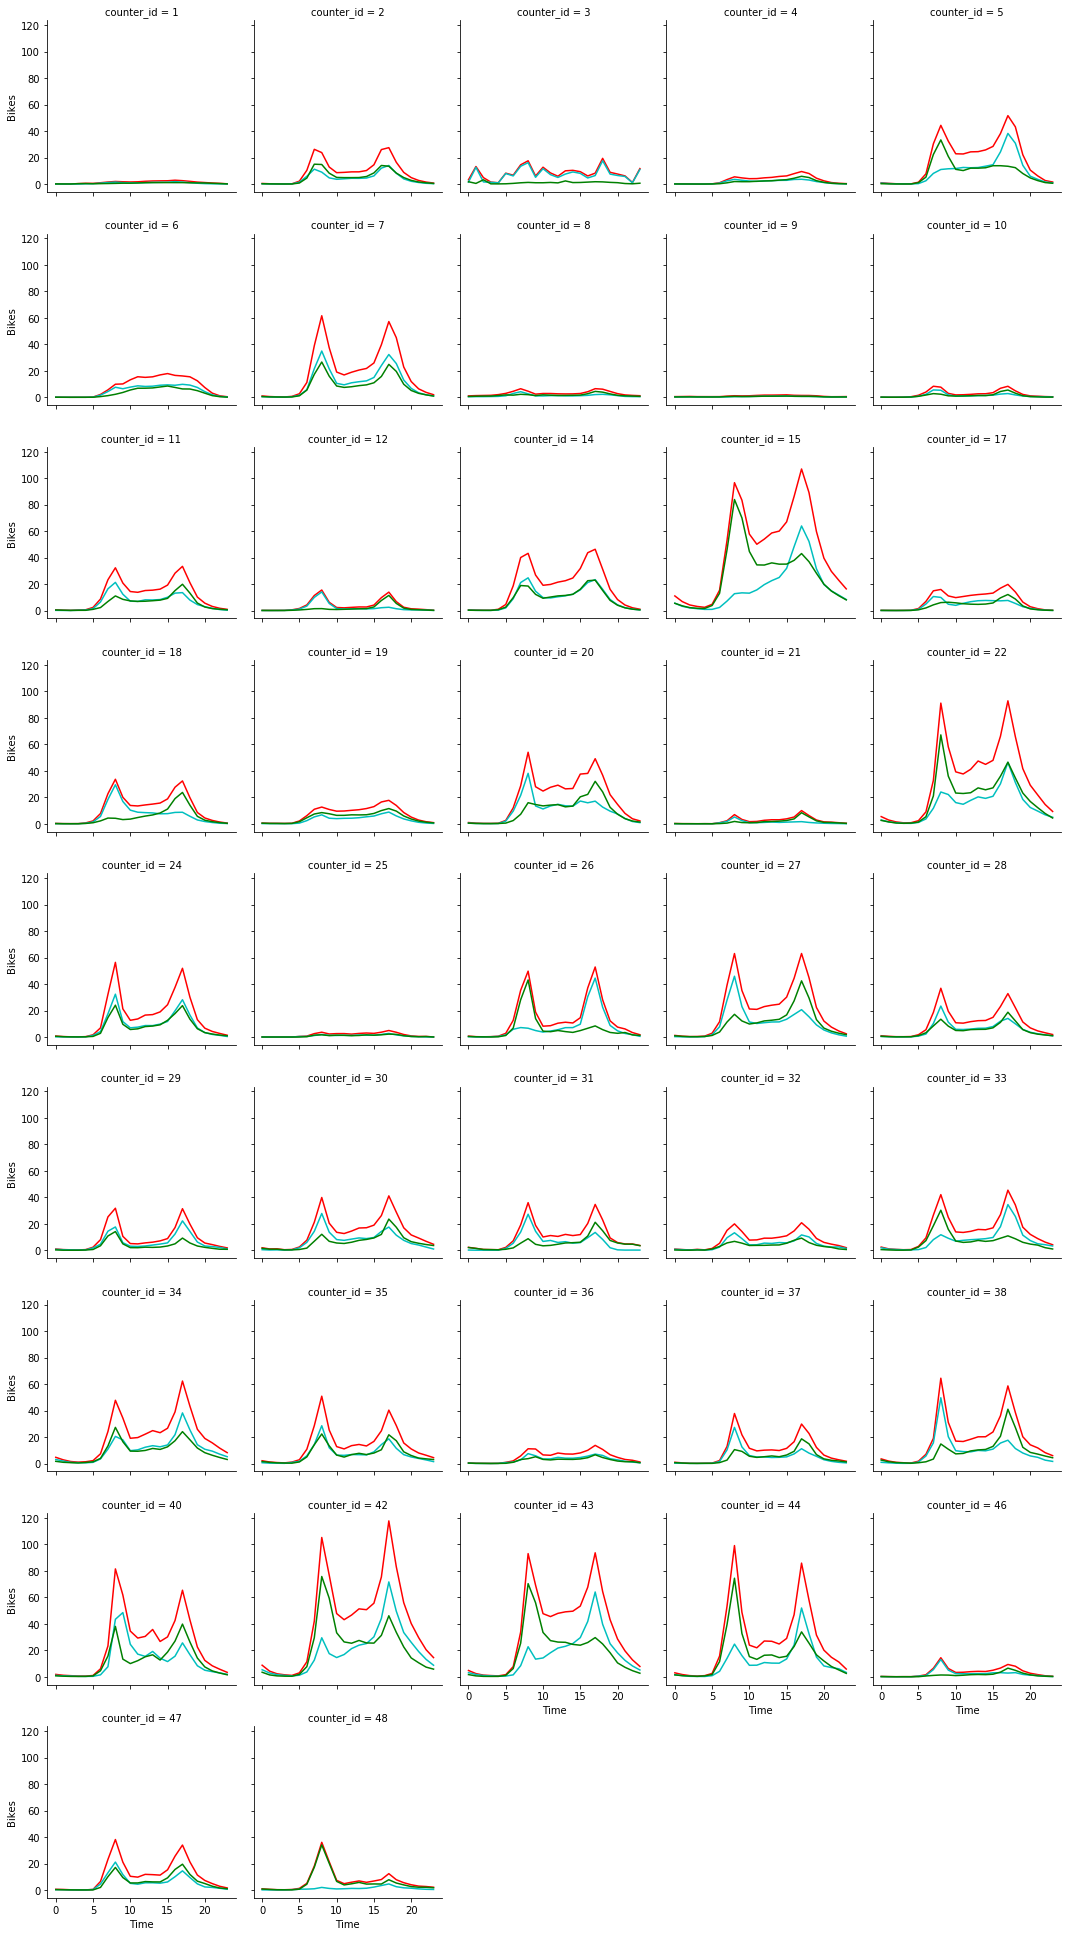

In [15]:
# lets plot basic activity across an averaged day for each location
daily_stats = bike_df.pivot_table(index=['counter_id','time'], aggfunc = 'mean')
daily_stats = daily_stats.reset_index(level=['counter_id', 'time'])
grid = sns.FacetGrid(daily_stats, col = "counter_id", col_wrap = 5)
grid.map(plt.plot, "time", "Total", color="r")
grid.map(plt.plot, "time", "direction_A", color="c")
grid.map(plt.plot, "time", "direction_B", color="g")
grid.set_axis_labels(x_var="Time", y_var="Bikes");

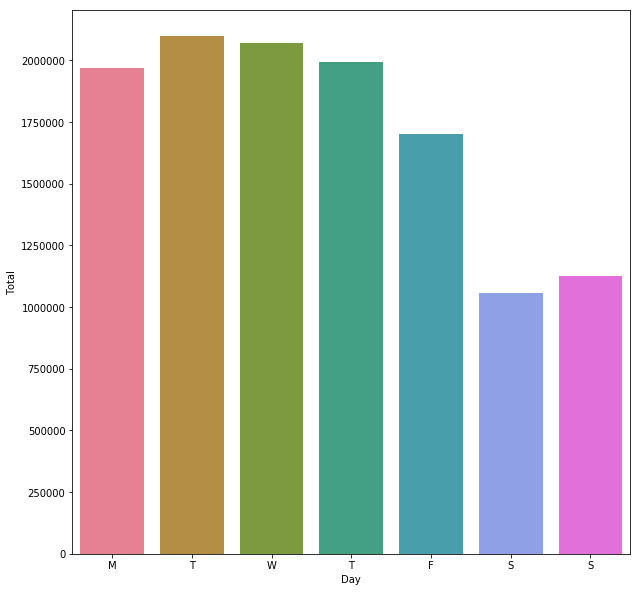

In [16]:
# lets plot total activity by day for all locations
weekly_stats = bike_df.pivot_table(index=['Day_no'], aggfunc = np.sum)
weekly_stats = weekly_stats.reset_index(level=['Day_no'])
figure, axes = plt.subplots(figsize = (10,10))
grid = sns.barplot(x = "Day_no", y = "Total", data = weekly_stats, ax = axes, palette = "husl")
grid.set_xlabel("Day")
grid.set_xticklabels(labels = ["M", "T", "W", "T", "F", "S", "S"]);

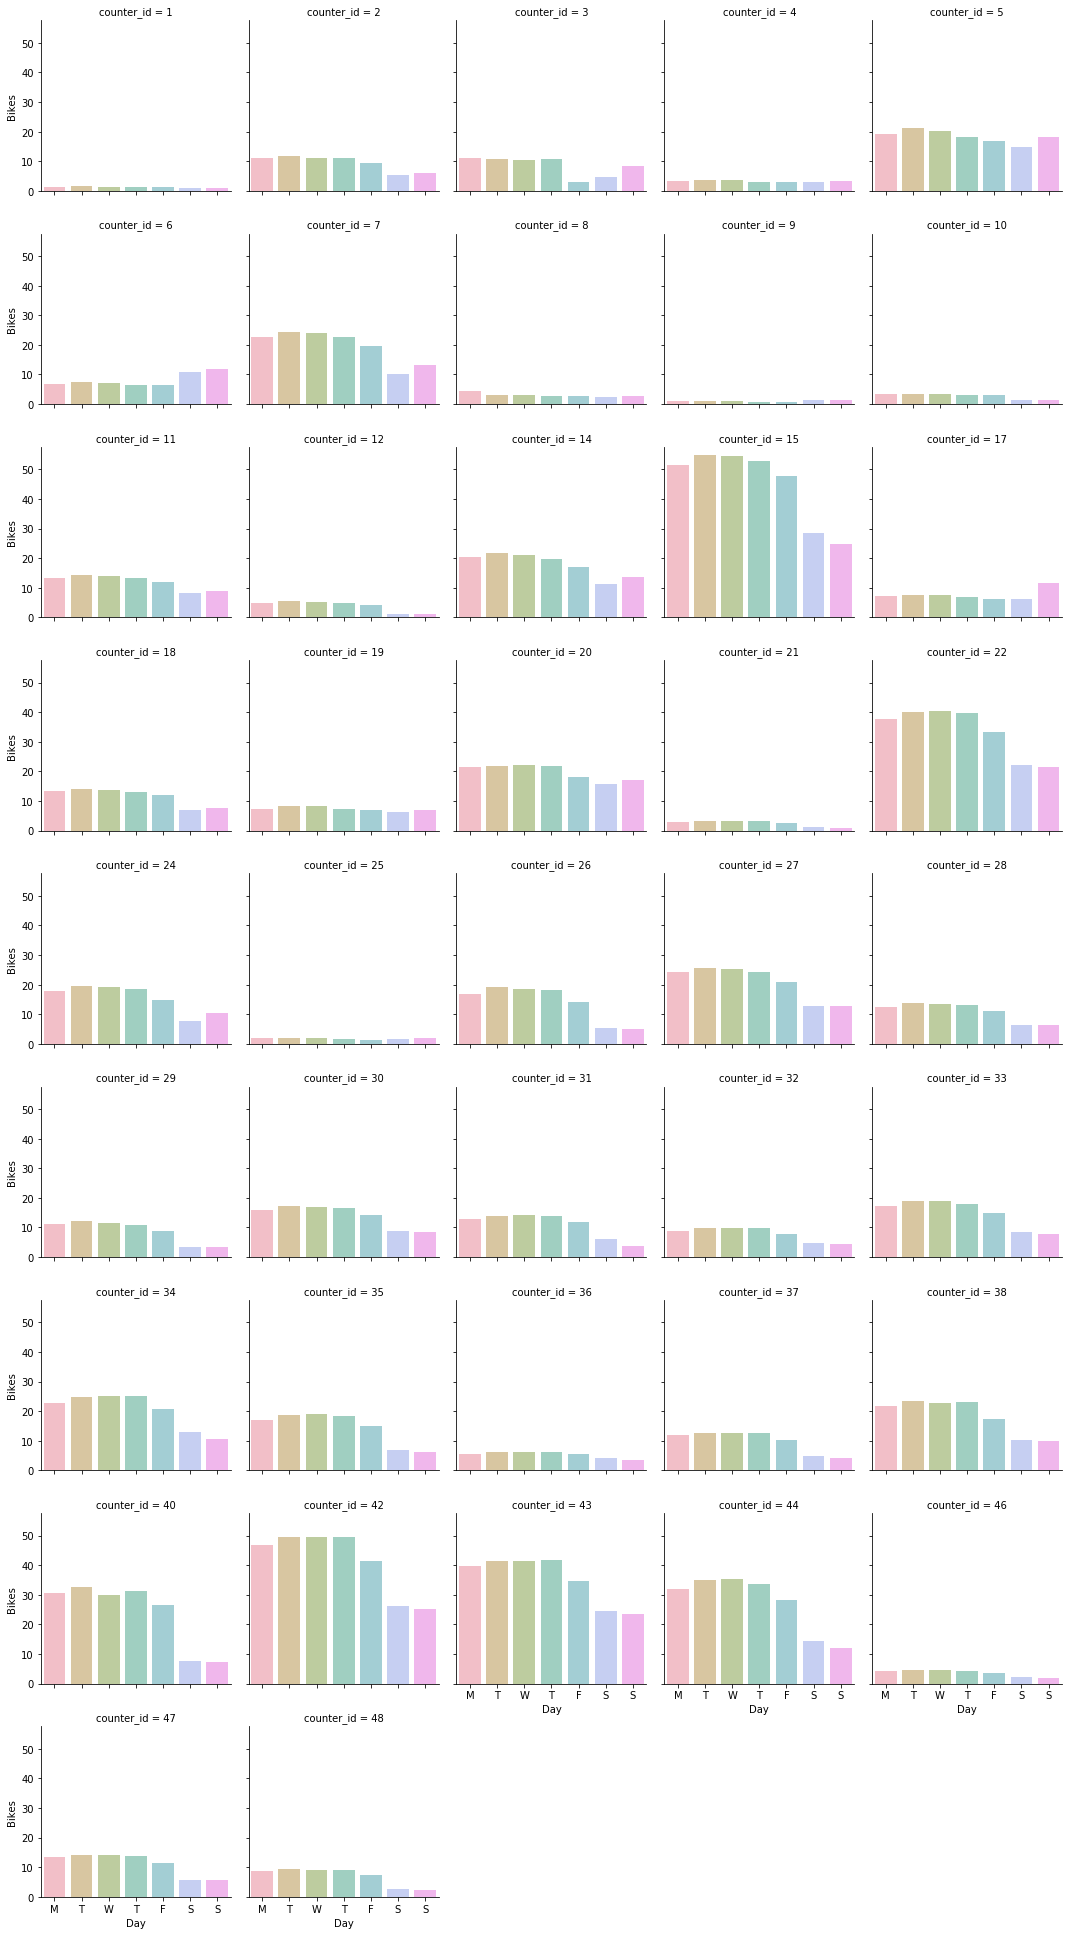

In [17]:
# lets plot basic activity across an averaged day for each location
weekly_stats = bike_df.pivot_table(index=['counter_id','Day_no'], aggfunc = 'mean')
weekly_stats = weekly_stats.reset_index(level=['counter_id', 'Day_no'])
grid = sns.FacetGrid(weekly_stats, col = "counter_id", col_wrap = 5)
grid.map(sns.barplot, "Day_no", "Total", alpha = 0.5, palette="husl")
#grid.map(sns.barplot, "Day_no", "direction_B", alpha = 0.5, color = 'r')
grid.set_axis_labels(x_var="Day", y_var="Bikes")
grid.set_xticklabels(labels = ["M", "T", "W", "T", "F", "S", "S"]);

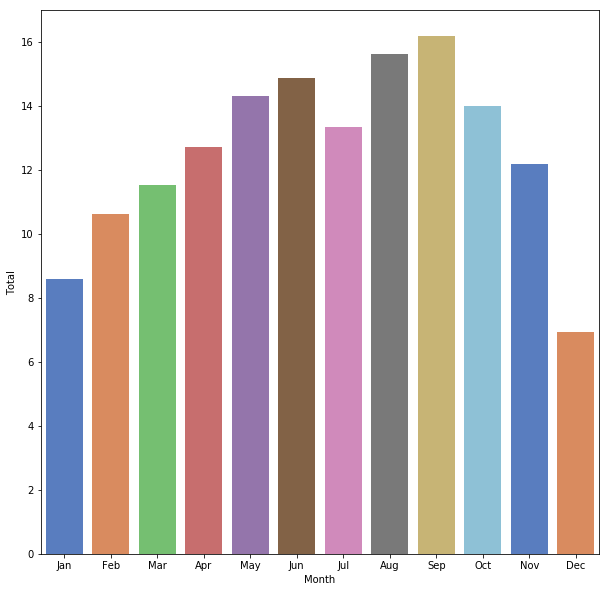

In [18]:
# lets plot basic activity across an averaged day for all locations
weekly_stats = bike_df.pivot_table(index=['Month'], aggfunc = "mean")
weekly_stats = weekly_stats.reset_index(level=['Month'])
figure, axes = plt.subplots(figsize = (10,10))
grid = sns.barplot(x = "Month", y = "Total", data = weekly_stats, palette = "muted", ax = axes)
grid.set_xlabel("Month")
grid.set_xticklabels(labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]);

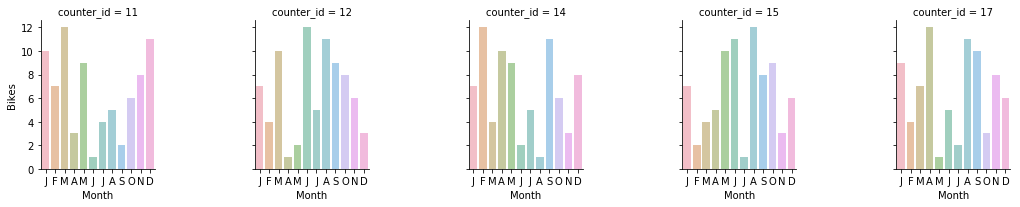

In [19]:
# lets plot basic activity across an averaged day for each location
weekly_stats = bike_df.pivot_table(index=['counter_id','Month'], aggfunc = 'mean')
weekly_stats = weekly_stats.reset_index(level=['counter_id', 'Month'])
grid = sns.FacetGrid(weekly_stats[120:180], col = "counter_id", col_wrap = 5)
grid.map(sns.barplot, "Day_no", "Month", alpha = 0.5, palette="husl")
#grid.map(sns.barplot, "Day_no", "direction_B", alpha = 0.5, color = 'r')
grid.set_axis_labels(x_var="Month", y_var="Bikes")
grid.set_xticklabels(labels = ["J", "F", "M", "A", "M", "J", "J", "A", "S", "O", "N", "D"]);

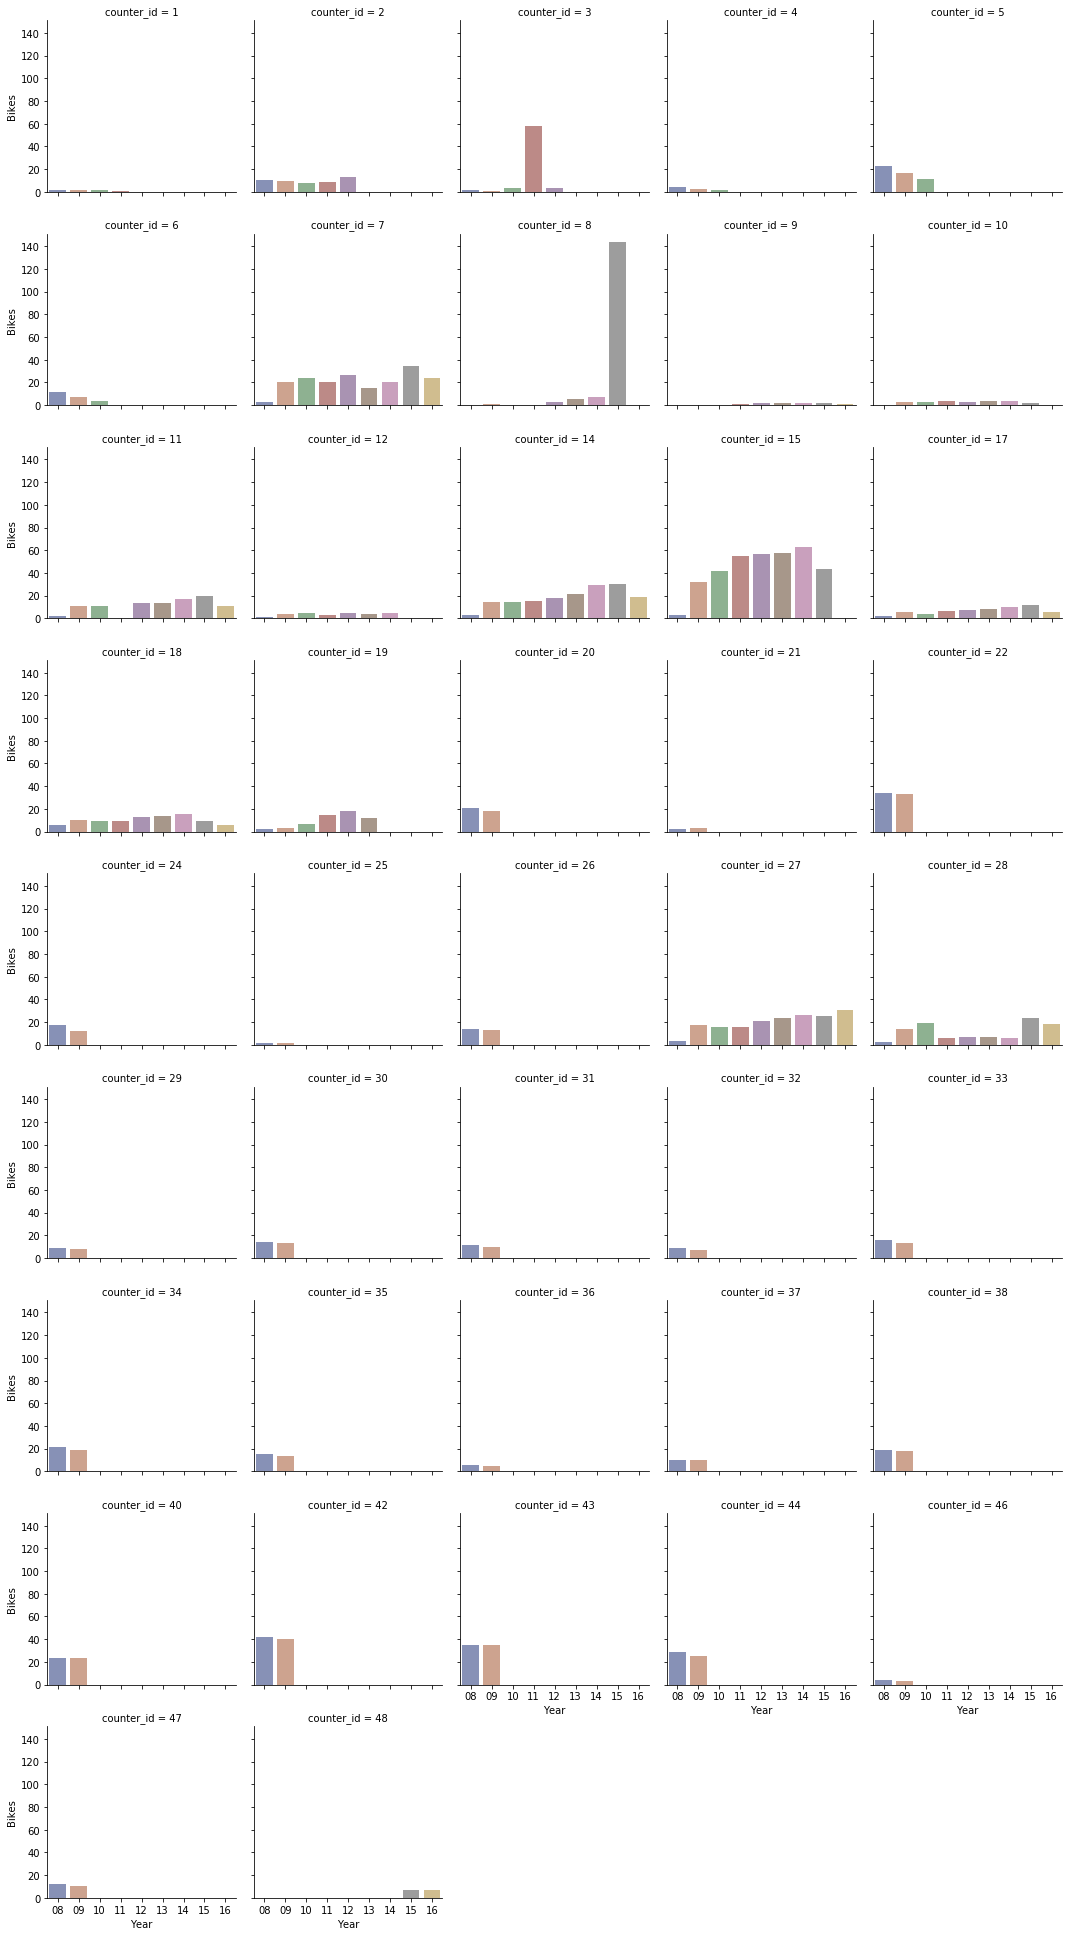

In [20]:
# lets plot basic activity across an everaged day for each location
weekly_stats = bike_df.pivot_table(index=['counter_id','Year'], aggfunc = 'mean', dropna=False)
weekly_stats = weekly_stats.reset_index(level=['counter_id', 'Year'])
# to ensure all years print we need to add some zero rows to the last element of the FacetGrid by adding lines to the dataframe
for i in range(0, 7):
    weekly_stats.loc[len(weekly_stats.index) + i] = [48, 2008+i,0,0,0,0,0,0,0,0,0,0]
#now we can plot
grid = sns.FacetGrid(weekly_stats, col = "counter_id", col_wrap = 5)
grid.map(sns.barplot, "Year", "Total", alpha = 0.5, palette="dark")
grid.set_axis_labels(x_var="Year", y_var="Bikes");
grid.set_xticklabels(labels = ["08", "09", "10", "11", "12", "13", "14", "15", "16"]);
# If you want to draw a bar plot on a FacetGrid, you are recommended to use the factorplot function with kind="bar"
# only this does not work!

In [21]:
# now lets consider mapping our survey locations
# OSM bounding box for Edinburgh: westlimit=-3.4101; southlimit=55.8800; eastlimit=-3.1002; northlimit=56.0000
# make a CSV of coordinates using tools at http://boundingbox.klokantech.com/
# lets load a dataframe containing the estimated location data for the various sensors
os.chdir(directory)
location_df = pd.read_csv("OSM_locations.csv")
location_df.head()

,Code,Name,Longitude,Latitude
0,1,Peffermill Road,-3.153122,55.932710
1,2,Steadfast Gate,-3.190584,55.971664
2,3,Hawkhill Avenue,-3.165173,55.962867
3,4,Seafield Street,-3.144812,55.969472
4,5,Blackhall,-3.244912,55.958095


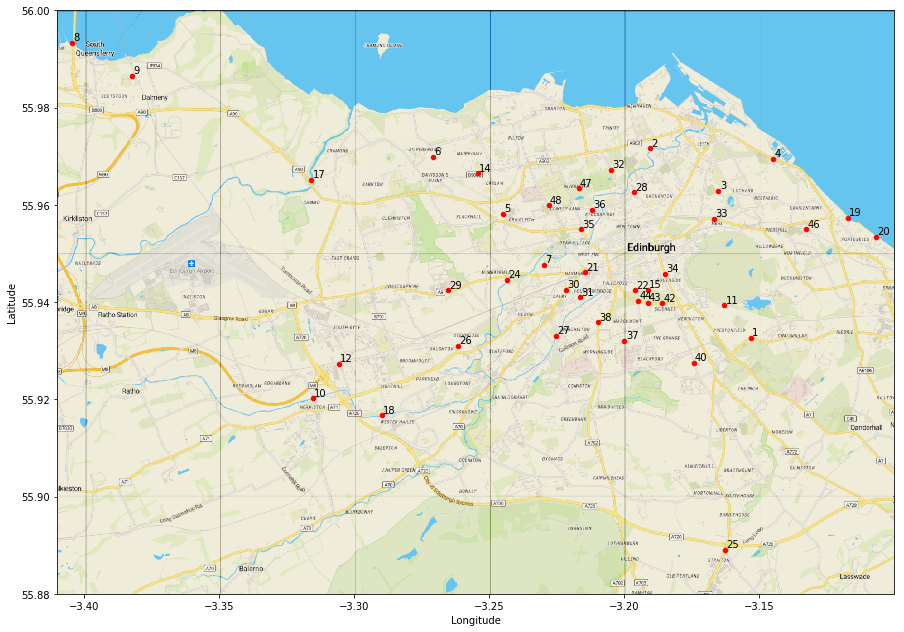

In [22]:
# lets scatter plot the locations
# first retrieve the locations
os.chdir(directory)
location_df = pd.read_csv("OSM_locations.csv")
location_df.head()
# specify the coordinates of our map section
left_m = -3.4101
right_m = -3.1002
top_m = 56.0000
bottom_m = 55.8800
v_scale = 1.8
# load our map and print it
image = plt.imread('EdinburghOSM.png')
figure, axes =  plt.subplots(figsize = (15,15))
axes.imshow(image, extent = [left_m, right_m, bottom_m, top_m], aspect=v_scale)
# then add our locations as a scatter plot on top
location_df.plot(x= "Longitude", y = "Latitude", kind = "scatter", color ='r', ax = axes)
# finally add annotations to the points
for row in location_df.itertuples():
    # slightly offset the labels for clarity
    axes.annotate(row[1], (row[3]+0.0005, row[4]+0.0005));

In [23]:
#lets create a new dataframe with the average journeys by location
local_traffic_df = bike_df.pivot_table(columns = ["counter_id"], aggfunc = "mean").T
local_traffic_df.reset_index(inplace= True)
local_traffic_df = local_traffic_df[["counter_id", "Total"]].copy()
traffic_pattern_df = pd.merge(location_df, local_traffic_df, left_on = "Code", right_on = "counter_id")

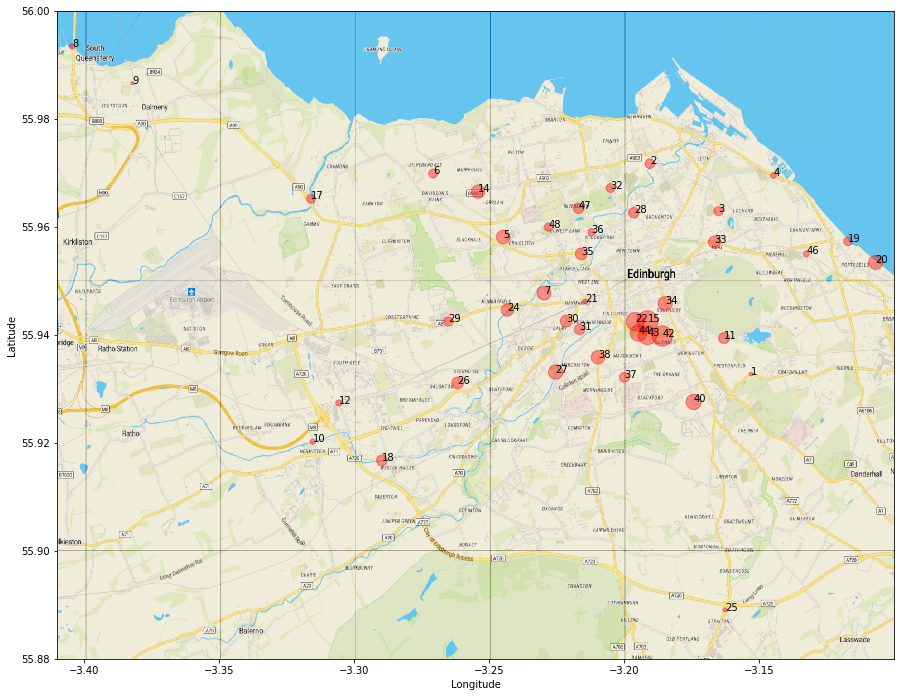

In [24]:
# now we are certain our data are aligned we can extract a list to use for pandas scatterplot sizes
size = list(traffic_pattern_df["Total"]*10)
# lets scatter plot the locations
# load our map and print it
image = plt.imread('EdinburghOSM.png')
figure, axes =  plt.subplots(figsize = (15,15))
axes.imshow(image, extent = [left_m, right_m, bottom_m, top_m], aspect=2)
# then add our locations as a scatter plot on top
traffic_pattern_df.plot.scatter(x= "Longitude", y = "Latitude", alpha = 0.4, s = size , color ='r', ax = axes)
# finally add annotations to the points
for row in location_df.itertuples():
    axes.annotate(row[1], (row[3], row[4]));